# Titanic: Machine Learning from Disaster

In [0]:
#Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#Initial Exploration of dataset
data = pd.read_csv('C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Try_with_matlab/train_orig.csv',sep=',')

In [0]:
data.shape

(891, 12)

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
#DATA
#PassengerId - type should be integers
#Survived - Survived or Not
#Pclass - Class of Travel
#Name - Name of Passenger
#Sex - Gender
#Age
#SibSp - Number of Sibling/Spouse aboard
#Parch - Number of Parent/Child aboard
#Ticket
#Fare
#Cabin
#Embarked - The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

In [0]:
#How Unique Ticket is
ticket = data['Ticket'].unique().tolist()
len(ticket)

681

In [0]:
#How Unique Cabin numbers are 
cabin = data['Cabin'].unique().tolist()
len(cabin)

148

In [0]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [0]:
#is any row NULL ?
data.isnull().any().any(), data.shape

(True, (891, 12))

In [0]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So we have 'null' values in 'Age','Cabin','Embarked' columns
Let's check relationships of Cabin and Embarked with other columns, see if we can drop these columns

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wells, Miss. Joan",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
#Check test dataset
data_test = pd.read_csv('C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Try_with_matlab/test_orig.csv',sep=',')

In [0]:
data_test.shape

(418, 11)

In [0]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age and Fare have null values

#### 1. CORRECT The Data

In [0]:
data['Embarked'].mode()

0    S
dtype: object

In [0]:
data['Embarked'].mode()[0]

'S'

In [0]:
data['Age'].fillna(value=data['Age'].median(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
data['Embarked'].fillna(value=data['Embarked'].mode()[0],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
data_test['Fare'].fillna(value=data_test['Fare'].median(),inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [0]:
data_test['Age'].fillna(value=data_test['Age'].median(),inplace=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 2. CLEAN the data
Convert Categorical values to numerical ones

We will use onehotencoding

In [0]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
col_y = ['Survived']
col_x = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data_2 = pd.get_dummies(data, columns=['Sex','Embarked'])

In [0]:
data_2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [0]:
data_2.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [0]:
col_x = ['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

In [0]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(5)
memory usage: 74.0+ KB


In [0]:
data_2.shape

(891, 15)

In [0]:
data_2_x = data_2[col_x]

In [0]:
data_2_x.shape

(891, 10)

In [0]:
data_2_x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [0]:
data_2_y = data_2[col_y]

In [0]:
data_2_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null int64
dtypes: int64(1)
memory usage: 7.0 KB


#### Let's split Training data in 75/25 ratio
##### We will use 75% data to train the model, Rest 25% we will use for Cross Validation (model accuracy)

#### Time to import sklearn :)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(
...     data_2_x, data_2_y, test_size=0.25, random_state=42)

Check correlation between datasets

In [0]:
import seaborn as sns

In [0]:
def heatMap(self, df):
    """
    Params: df - DataFrame of our Abalone data
    Return: Generates a heatmap plot
    """
    #Create Correlation df
    
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(12, 10))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

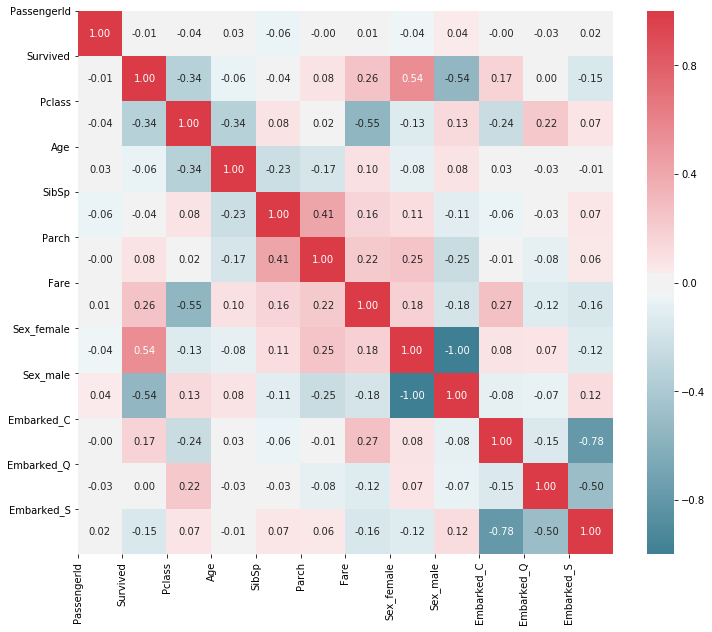

In [0]:
heatMap(data_2,data_2)

In [0]:
# Drop Self Correlations
# Not Working, will look into it later
def halfHeatMap(df, mirror):
    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    if mirror == True:
        #Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
        #Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        #Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot
        
    else:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True# Generate Color Map
        colormap = sns.diverging_palette(220, 10, as_cmap=True)
        # Generate Heat Map, allow annotations and place floats in map
        sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
        # Apply xticks
        plt.xticks(range(len(corr.columns)), corr.columns);
        # Apply yticks
        plt.yticks(range(len(corr.columns)), corr.columns)
        #show plot
        plt.show()
        
    plt.show()

In [0]:
#halfHeatMap(data_2,data_2)

### Now the data is clean, let's move to Model

Let's First use logistic regresstion

We will use other algoritms later

In [0]:
# import Logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [0]:
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 1 columns):
Survived    668 non-null int64
dtypes: int64(1)
memory usage: 10.4 KB


In [0]:
y_train.shape

(668, 1)

In [0]:
from sklearn.utils import validation

In [0]:
y_train_2 = validation.column_or_1d(y_train, warn=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_train['Survived'].head()

298    1
884    0
247    1
478    0
305    1
Name: Survived, dtype: int64

In [0]:
y_train_2 = y_train.as_matrix(columns = y_train['Survived'])

In [0]:
y_train_2.shape

(668, 668)

In [0]:
y_train.columns

Index(['Survived'], dtype='object')

In [0]:
y_train.columns[1:]

Index([], dtype='object')

In [0]:
y_train.columns

Index(['Survived'], dtype='object')

In [0]:
y_train.iloc[:,:].values

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [0]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 1 columns):
Survived    668 non-null int64
dtypes: int64(1)
memory usage: 10.4 KB


In [0]:
y_train_2 = y_train.iloc[:,:].values

In [0]:
y_train_2

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [0]:
y_train_3 = validation.column_or_1d(y_train_2, warn=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
y_train_3 = y_train_2.ravel()

In [0]:
y_train_3[1:5]

array([0, 1, 0, 1], dtype=int64)

In [0]:
y_train_3.shape

(668,)

In [0]:
y_train_3

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [0]:
y_train

,Survived
298,1
884,0
247,1
478,0
305,1
316,1
2,1
405,0
742,1
260,0


In [0]:
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train_3)

In [0]:
logreg.predict(x_train)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [0]:
logreg.predict_proba(x_train)

array([[0.52447752, 0.47552248],
       [0.73563863, 0.26436137],
       [0.33976473, 0.66023527],
       ...,
       [0.82222324, 0.17777676],
       [0.20791319, 0.79208681],
       [0.49281118, 0.50718882]])

In [0]:
logreg.score(x_train,y_train_3)

0.7994011976047904

In [0]:
y_test.iloc[:,:].values

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [0]:
y_test_2 = y_test.iloc[:,:].values
y_test_2.ravel()
y_test_2[:5]

array([[1],
       [0],
       [0],
       [1],
       [1]], dtype=int64)

In [0]:
type(y_train)

pandas.core.frame.DataFrame

In [0]:
y_predict_train = logreg.predict(x_train)

In [0]:
type(y_predict_train)

numpy.ndarray

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
#accuracy_score(y_true = y_train, y_pred = y_predict_train)
y_predict_train[:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [0]:
accuracy_score(y_true = y_train, y_pred = y_predict_train)

0.7994011976047904

In [0]:
#Test on cross validation set
y_predict_test = logreg.predict(x_test)
accuracy_score(y_true = y_test, y_pred = y_predict_test)

0.8071748878923767

In [0]:
data_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1


In [0]:
# Now, prepare test data and predict on this data using logistic regression technique

data_test = pd.get_dummies(data_test, columns=['Sex','Embarked'])

In [0]:
data_test_x = data_test[col_x]

#y = logreg.predict(data_test_x)

In [0]:
y = logreg.predict(data_test_x)

In [0]:
y[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [0]:
len(y)

418

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict.txt', y, delimiter=',',fmt = '%d')

In [0]:
data_test_x.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
5,3,14.0,0,0,9.2250,0,1,0,0,1
6,3,30.0,0,0,7.6292,1,0,0,1,0
7,2,26.0,1,1,29.0000,0,1,0,0,1
8,3,18.0,0,0,7.2292,1,0,1,0,0
9,3,21.0,2,0,24.1500,0,1,0,0,1


In [0]:
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(data_2_x, data_2_y.values.ravel())

In [0]:
data_2_y.values.ravel()

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [0]:
y_train_1 = data_2_y.values.ravel()

In [0]:
data_2_y.columns

Index(['Survived'], dtype='object')

In [0]:
len(y_train_1)

891

In [0]:
m = len(y_train_1)
for i in range(0,(m-1)):
        if (data_2_y['Survived'][i] - y_train_1[i]) != 0:
            print(i)

In [0]:
y_train_1[4]

0

In [0]:
data_2_y['Survived'][4]

0

In [0]:
## THIS IS WRONG.. WE modelled on same data so should not check accuracy on same.. we should use a cross-validation set instead
y = logreg.predict(data_test_x)

In [0]:
y_predict_train = logreg.predict(data_2_x)

In [0]:
accuracy_score(y_true = data_2_y, y_pred = y_predict_train)

0.8013468013468014

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict_logreg.txt', y, delimiter=',',fmt = '%d')

In [0]:
sum(y)

158

In [0]:
sum(y_predict_train)

313

In [0]:
sum(data_2_y['Survived'])

342

## <u>Applying Decision Trees Algorithm</u>

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
survival_classifier_dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
# survival_classifier_dt.fit(data_2_x, data_2_y)
# predict_dt = survival_classifier_dt.predict(data_2_x)
# predict_dt[:10]
# data_2_y['Survived'][:10]
# accuracy_score(y_true = data_2_y, y_pred = predict_dt)

In [0]:
survival_classifier_dt.fit(data_2_x, data_2_y)
# predict_dt = survival_classifier_dt.predict(data_2_x)
# predict_dt[:10]
# data_2_y['Survived'][:10]
# accuracy_score(y_true = data_2_y, y_pred = predict_dt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [0]:
## THIS IS WRONG.. WE modelled on same data so should not check accuracy on same.. we should use a cross-validation set instead
predict_dt = survival_classifier_dt.predict(data_2_x)
# predict_dt[:10]
# data_2_y['Survived'][:10]
# accuracy_score(y_true = data_2_y, y_pred = predict_dt)

In [0]:
predict_dt[:10]
# data_2_y['Survived'][:10]
# accuracy_score(y_true = data_2_y, y_pred = predict_dt)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [0]:
data_2_y['Survived'][:10]
# accuracy_score(y_true = data_2_y, y_pred = predict_dt)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [0]:
accuracy_score(y_true = data_2_y, y_pred = predict_dt)

0.8327721661054994

In [0]:
#predict on test dataset
predict_dt_t = survival_classifier_dt.predict(data_test_x)

In [0]:
type(predict_dt_t)

numpy.ndarray

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict_decision_trees.txt', predict_dt_t, delimiter=',',fmt = '%d')

## <u>Using SVM</u>

In [0]:
from sklearn import svm

In [0]:
# Try using Linear kernal firt, we will try using gaussian kernal too later
svm_classifier = svm.SVC(kernel='linear')

In [0]:
svm_classifier.fit(data_2_x, data_2_y.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred_svm = svm_classifier.predict(data_test_x)

In [0]:
type(y_pred_svm)

numpy.ndarray

In [0]:
y_pred_svm[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict_svm.txt', y_pred_svm, delimiter=',',fmt = '%d')

In [0]:
sum(y_pred_svm)

152

###### Chnaging Kernal

In [0]:
svm_classifier_rbf = svm.SVC(kernel='rbf')

In [0]:
svm_classifier_rbf.fit(data_2_x, data_2_y.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
y_pred_svm_rbf = svm_classifier_rbf.predict(data_test_x)

In [0]:
y_pred_svm_rbf[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [0]:
sum(y_pred_svm_rbf)

160

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict_svm_rbf.txt', y_pred_svm_rbf, delimiter=',',fmt = '%d')

In [0]:
import sklearn
print("scikit-learn version: {}". format(sklearn.__version__))

scikit-learn version: 0.19.1


#### NuSVC

In [0]:
svm_clf_nu = svm.NuSVC()

In [0]:
svm_clf_nu.fit(data_2_x, data_2_y.values.ravel())

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=False, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_svm_nu = svm_clf_nu.predict(data_test_x)

In [0]:
y_pred_svm_nu[:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [0]:
sum(y_pred_svm_nu)

164

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict_svm_nu.txt', \
           y_pred_svm_nu, delimiter=',',fmt = '%d')

In [0]:
sum(predict_dt_t)

146

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [0]:
rf_clf.fit(data_2_x,data_2_y.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
y_rf = rf_clf.predict(data_test_x)

In [0]:
sum(y_rf)

159

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict_rf.txt', \
           y_rf, delimiter=',',fmt = '%d')

## Maximum Accuracy achieved from Decision Tree: 0.77033

### Let's work on getting better accuracy

### 1. Trying Shuffle Split

In [0]:
from sklearn import model_selection
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [0]:
# Let's apply different algorithms at once

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble
# from xgboost import XGBClassifier

Algs = [
    #Ensemble Methods
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #xgboost
    ## XGBClassifier()
]

In [0]:
predictions = []
for alg in Algs:

    #set name and parameters
    alg_name = alg.__class__.__name__
    
    #score model with cross validation
    cv_results = model_selection.cross_validate(alg, data_2_x, data_2_y, cv  = cv_split)

    # Print Score
    time = cv_results['fit_time'].mean()
    train_accuracy_mean = cv_results['train_score'].mean()
    test_accuracy_mean = cv_results['test_score'].mean()
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, 
    #should statistically capture 99.7% of the subsets
    #let's know the worst that can happen!
    test_accuracy_3STD = cv_results['test_score'].std()*3
    
    print('Algorithm: ', alg_name)
    print('Time: ', time)
    print('Algo Train Accuracy Mean: ',train_accuracy_mean)
    print('Algo Test Accuracy Mean: ', test_accuracy_mean)
    print('Algo 3*Standard Deviation Accuracy: ', test_accuracy_3STD)

    #save MLA predictions - see section 6 for usage
    alg.fit(data_2_x, data_2_y)
    target = alg.predict(data_2_x)
    
    predictions.append(target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Algorithm:  GradientBoostingClassifier
Time:  0.07664966583251953
Algo Train Accuracy Mean:  0.9127340823970037
Algo Test Accuracy Mean:  0.833955223880597
Algo 3*Standard Deviation Accuracy:  0.05280213320180932


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

Algorithm:  RandomForestClassifier
Time:  0.019147610664367674
Algo Train Accuracy Mean:  0.9659176029962548
Algo Test Accuracy Mean:  0.8048507462686567
Algo 3*Standard Deviation Accuracy:  0.08772149193342568


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Algorithm:  LogisticRegressionCV
Time:  0.3994673013687134
Algo Train Accuracy Mean:  0.8088014981273407
Algo Test Accuracy Mean:  0.8022388059701493
Algo 3*Standard Deviation Accuracy:  0.05274277159428242


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:1354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:1354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:1354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:1354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Algorithm:  RidgeClassifierCV
Time:  0.005684709548950196
Algo Train Accuracy Mean:  0.8041198501872658
Algo Test Accuracy Mean:  0.7958955223880597
Algo 3*Standard Deviation Accuracy:  0.04829027151520077
Algorithm:  BernoulliNB
Time:  0.004190587997436523
Algo Train Accuracy Mean:  0.7883895131086142
Algo Test Accuracy Mean:  0.7880597014925372
Algo 3*Standard Deviation Accuracy:  0.043006058311116126
Algorithm:  GaussianNB
Time:  0.002693629264831543
Algo Train Accuracy Mean:  0.7986891385767791
Algo Test Accuracy Mean:  0.7858208955223881
Algo 3*Standard Deviation Accuracy:  0.05419575419512031


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

Algorithm:  KNeighborsClassifier
Time:  0.0033908367156982424
Algo Train Accuracy Mean:  0.798501872659176
Algo Test Accuracy Mean:  0.7305970149253731
Algo 3*Standard Deviation Accuracy:  0.0471745690426242


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Algorithm:  SVC
Time:  0.06700718402862549
Algo Train Accuracy Mean:  0.9024344569288388
Algo Test Accuracy Mean:  0.7126865671641791
Algo 3*Standard Deviation Accuracy:  0.08210651113832351


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Algorithm:  NuSVC
Time:  0.07441561222076416
Algo Train Accuracy Mean:  0.9226591760299625
Algo Test Accuracy Mean:  0.726865671641791
Algo 3*Standard Deviation Accuracy:  0.08711228264930027


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Algorithm:  LinearSVC
Time:  0.037798094749450686
Algo Train Accuracy Mean:  0.7314606741573033
Algo Test Accuracy Mean:  0.7369402985074627
Algo 3*Standard Deviation Accuracy:  0.13114225202082067
Algorithm:  DecisionTreeClassifier
Time:  0.003889155387878418
Algo Train Accuracy Mean:  0.98501872659176
Algo Test Accuracy Mean:  0.7772388059701492
Algo 3*Standard Deviation Accuracy:  0.051795829707131105
Algorithm:  ExtraTreeClassifier
Time:  0.002993011474609375
Algo Train Accuracy Mean:  0.98501872659176
Algo Test Accuracy Mean:  0.7850746268656716
Algo 3*Standard Deviation Accuracy:  0.04103799129811202


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


### Results

#### Algorithm:  GradientBoostingClassifier

Time:  0.09155192375183105

Algo Train Accuracy Mean:  0.9127340823970037

Algo Test Accuracy Mean:  0.833955223880597

Algo 3*Standard Deviation Accuracy:  0.05280213320180932


#### Algorithm:  RandomForestClassifier

Time:  0.017883110046386718

Algo Train Accuracy Mean:  0.9676029962546817

Algo Test Accuracy Mean:  0.8082089552238806

Algo 3*Standard Deviation Accuracy:  0.06155698694716803


#### Algorithm:  LogisticRegressionCV

Time:  0.36680212020874026

Algo Train Accuracy Mean:  0.8088014981273407

Algo Test Accuracy Mean:  0.8022388059701493

Algo 3*Standard Deviation Accuracy:  0.05274277159428242


#### Algorithm:  RidgeClassifierCV

Time:  0.04713230133056641

Algo Train Accuracy Mean:  0.8041198501872658

Algo Test Accuracy Mean:  0.7958955223880597

Algo 3*Standard Deviation Accuracy:  0.04829027151520077


#### Algorithm:  BernoulliNB

Time:  0.0033913373947143553

Algo Train Accuracy Mean:  0.7883895131086142

Algo Test Accuracy Mean:  0.7880597014925372

Algo 3*Standard Deviation Accuracy:  0.043006058311116126


#### Algorithm:  GaussianNB

Time:  0.0023940324783325194

Algo Train Accuracy Mean:  0.7986891385767791

Algo Test Accuracy Mean:  0.7858208955223881

Algo 3*Standard Deviation Accuracy:  0.05419575419512031


#### Algorithm:  KNeighborsClassifier

Time:  0.005916762351989746

Algo Train Accuracy Mean:  0.798501872659176

Algo Test Accuracy Mean:  0.7305970149253731

Algo 3*Standard Deviation Accuracy:  0.0471745690426242



#### Algorithm:  SVC

Time:  0.07184240818023682

Algo Train Accuracy Mean:  0.9024344569288388

Algo Test Accuracy Mean:  0.7126865671641791

Algo 3*Standard Deviation Accuracy:  0.08210651113832351



#### Algorithm:  NuSVC

Time:  0.07649343013763428

Algo Train Accuracy Mean:  0.9226591760299625

Algo Test Accuracy Mean:  0.726865671641791

Algo 3*Standard Deviation Accuracy:  0.08711228264930027



#### Algorithm:  LinearSVC

Time:  0.03685054779052734

Algo Train Accuracy Mean:  0.75561797752809

Algo Test Accuracy Mean:  0.7600746268656715

Algo 3*Standard Deviation Accuracy:  0.08407454207742718



#### Algorithm:  DecisionTreeClassifier

Time:  0.0038892269134521485

Algo Train Accuracy Mean:  0.98501872659176

Algo Test Accuracy Mean:  0.7779850746268656

Algo 3*Standard Deviation Accuracy:  0.04622199139267745



#### Algorithm:  ExtraTreeClassifier

Time:  0.001994776725769043

Algo Train Accuracy Mean:  0.98501872659176

Algo Test Accuracy Mean:  0.7764925373134328

Algo 3*Standard Deviation Accuracy:  0.06962830540336118


In [0]:
len(predictions)

12

In [0]:
predictions

[array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 

In [0]:
predictions[1]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\predict_gradient_boost.txt', \
           predictions[0], delimiter=',',fmt = '%d')

In [0]:
sum(predictions[0])

298

In [0]:
for i in range(0,len(predictions)):
    print(sum(predictions[i]))

298
332
303
316
314
345
306
324
329
126
328
328


In [0]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
# Predict on Test Data

algo_predict_test = []
algo_name = []
index = 0
for alg in Algs:
    AL_name = alg.__class__.__name__
    algo_name.append(AL_name)
    y = alg.predict(data_test_x)
    algo_predict_test.append(y)
    index+= 1

In [0]:
print(len(algo_predict_test))
print('-'*10)
for i in range(0,len(algo_predict_test)):
    print(sum(algo_predict_test[i]))

12
----------
146
148
150
155
152
179
159
160
164
69
192
165


In [0]:
np.savetxt('C:\OTHER_THAN_C_FOLDERS\Training\DataScience\Kaggle\Titanic\Outputs\gradient_boost.txt', \
           algo_predict_test[0], delimiter=',',fmt = '%d')

# Gradient Boosting - Accuracy  - 0.79425

## Kaggle kernal code testing

In [0]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [0]:
import pandas as pd
import numpy as np

data_raw = pd.read_csv('C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Data/train.csv')

data_val  = pd.read_csv('C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Data/test.csv')

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]

In [0]:
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [0]:
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
data1.info()
data_val.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null in

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
826,0,3,"Lam, Mr. Len",male,28.0,0,0,56.4958,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
729,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,7.9250,S,2,0,Miss,"(7.91, 14.454]","(16.0, 32.0]"
138,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,9.2167,S,1,1,Mr,"(7.91, 14.454]","(-0.08, 16.0]"
364,0,3,"O'Brien, Mr. Thomas",male,28.0,1,0,15.5000,Q,2,0,Mr,"(14.454, 31.0]","(16.0, 32.0]"
716,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,227.5250,C,1,1,Miss,"(31.0, 512.329]","(32.0, 48.0]"
815,0,1,"Fry, Mr. Richard",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
304,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
349,0,3,"Dimic, Mr. Jovan",male,42.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,C,5,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
841,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(-0.08, 16.0]"


In [0]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [0]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')


Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Palsson, Miss. Stina Viola",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [0]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier()    
    ]

In [0]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [0]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y wa

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0331028
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.891199,0.824254,0.0551696,0.0189128
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.822761,0.0647418,0.0208006
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0412316
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.085293
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.822015,0.0472409,0.00156209
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.892135,0.81903,0.0571334,0.0244023
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00160019
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820412,0.81194,0.0498606,0.0765834
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.871723,0.810448,0.0492537,0.954147


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0,0.5,'Algorithm')

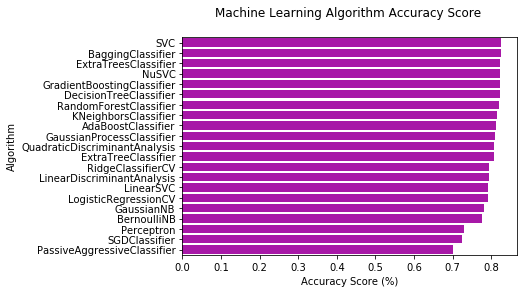

In [0]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [0]:
for MLA_name in MLA_predict:
    print(MLA_name, sum(MLA_predict[MLA_name]), sep=" : ")


Survived : 342
AdaBoostClassifier : 338
BaggingClassifier : 311
ExtraTreesClassifier : 287
GradientBoostingClassifier : 285
RandomForestClassifier : 315
GaussianProcessClassifier : 311
LogisticRegressionCV : 325
PassiveAggressiveClassifier : 270
RidgeClassifierCV : 305
SGDClassifier : 346
Perceptron : 258
BernoulliNB : 317
GaussianNB : 386
KNeighborsClassifier : 316
SVC : 307
NuSVC : 308
LinearSVC : 315
DecisionTreeClassifier : 287
ExtraTreeClassifier : 287
LinearDiscriminantAnalysis : 305
QuadraticDiscriminantAnalysis : 340


In [0]:
type(MLA_predict)

pandas.core.frame.DataFrame

In [0]:
MLA_predict.head()

,Survived,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GaussianProcessClassifier,LogisticRegressionCV,PassiveAggressiveClassifier,RidgeClassifierCV,...,BernoulliNB,GaussianNB,KNeighborsClassifier,SVC,NuSVC,LinearSVC,DecisionTreeClassifier,ExtraTreeClassifier,LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,0,0,0,0,0,1,1,1,...,1,1,0,1,1,1,0,0,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [0]:
# Predict on Test Data

MLA_predict_test = []
MLA_name = []
index = 0
for alg in MLA:
    AL_name = alg.__class__.__name__
    MLA_name.append(AL_name)
    y = alg.predict(data_val[data1_x_bin])
    MLA_predict_test.append(y)
    index+= 1
    
print(len(MLA_predict_test))
print('-'*20)
for i in range(0,len(MLA_predict_test)):
    print(i+1, MLA_name[i], sum(MLA_predict_test[i]), sep=" : ")

21
--------------------
1 : AdaBoostClassifier : 178
2 : BaggingClassifier : 164
3 : ExtraTreesClassifier : 172
4 : GradientBoostingClassifier : 157
5 : RandomForestClassifier : 193
6 : GaussianProcessClassifier : 301
7 : LogisticRegressionCV : 114
8 : PassiveAggressiveClassifier : 93
9 : RidgeClassifierCV : 123
10 : SGDClassifier : 126
11 : Perceptron : 123
12 : BernoulliNB : 131
13 : GaussianNB : 293
14 : KNeighborsClassifier : 270
15 : SVC : 165
16 : NuSVC : 177
17 : LinearSVC : 122
18 : DecisionTreeClassifier : 133
19 : ExtraTreeClassifier : 135
20 : LinearDiscriminantAnalysis : 123
21 : QuadraticDiscriminantAnalysis : 235


In [0]:
for i in range(0,len(MLA_predict_test)):
    fname = 'C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Outputs/' + MLA_name[i] + '.txt'
    np.savetxt(fname, MLA_predict_test[i], delimiter=',',fmt = '%d')

# ----------------------------------------------------------------

In [0]:
data_raw = pd.read_csv('C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Data/train.csv')

data_val  = pd.read_csv('C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Data/test.csv')

data1 = data_raw.copy(deep = True)

data1.columns
#data_cleaner = [data1, data_val]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
col2 = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [0]:
data2 = data1[col2]

In [0]:
data_comb = pd.concat([data2, data_val])

In [0]:
data_comb.shape

(1309, 12)

In [0]:
data_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [0]:
#data_comb['Title'] = data_comb.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data_comb['Title'] = data_comb['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
pd.crosstab(data_comb['Title'], data_comb['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [0]:
data_comb['Title'] = data_comb['Title'].replace('Mlle', 'Miss')
data_comb['Title'] = data_comb['Title'].replace('Ms', 'Miss')
data_comb['Title'] = data_comb['Title'].replace('Mme', 'Mrs')
title_names = (data_comb['Title'].value_counts() < 10) #this will create a true false series with title name as index
data_comb['Title'] = data_comb['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data_comb['Title'].value_counts())
print("-"*10)

Mr        757
Miss      264
Mrs       198
Master     61
Misc       29
Name: Title, dtype: int64
----------


In [0]:
data_comb['FamilySize'] = data_comb ['SibSp'] + data_comb['Parch'] + 1

In [0]:
data_comb['IsAlone'] = 1 #initialize to yes/1 is alone
data_comb['IsAlone'].loc[data_comb['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

In [0]:
## CAN NOT INSTALL FANCYIMPUTE.. WILL CHECK LATER
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, IterativeImputer, BiScaler

In [0]:
data_comb['Age'].fillna(data_comb['Age'].median(), inplace = True)

data_comb['Embarked'].fillna(data_comb['Embarked'].mode()[0], inplace = True)

data_comb['Fare'].fillna(data_comb['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['Cabin', 'Ticket']
data_comb.drop(drop_column, axis=1, inplace = True)

print(data_comb.isnull().sum())

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Title            0
FamilySize       0
IsAlone          0
dtype: int64


In [0]:
data_comb['FareBin'] = pd.qcut(data_comb['Fare'], 4)
data_comb['AgeBin'] = pd.cut(data_comb['Age'].astype(int), 5)

In [0]:
# Convert to Categorical Data
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
data_comb['Sex_Code'] = label.fit_transform(data_comb['Sex'])
data_comb['Embarked_Code'] = label.fit_transform(data_comb['Embarked'])
data_comb['Title_Code'] = label.fit_transform(data_comb['Title'])
data_comb['AgeBin_Code'] = label.fit_transform(data_comb['AgeBin'])
data_comb['FareBin_Code'] = label.fit_transform(data_comb['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data2_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
data2_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
data2_xy =  Target + data2_x
print('Original X Y: ', data2_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data2_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data2_xy_bin = Target + data2_x_bin
print('Bin X Y: ', data2_xy_bin, '\n')


#define x and y variables for dummy features original
data2_dummy = pd.get_dummies(data2[data2_x])
data2_x_dummy = data2_dummy.columns.tolist()
data2_xy_dummy = Target + data2_x_dummy
print('Dummy X Y: ', data2_xy_dummy, '\n')



data2_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [0]:
#### --- NOW SPLIT THE DATA BACKK......

data2 =  data_comb.iloc[0:891]

In [0]:
data2.shape

(891, 20)

In [0]:
data2.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,Mr,2,0,"(-0.001, 7.896]","(16.0, 32.0]",1,2,3,1,0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,Mrs,2,0,"(31.275, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,Miss,1,1,"(7.896, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,Mrs,2,0,"(31.275, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,Mr,1,1,"(7.896, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [0]:
type(data2)

pandas.core.frame.DataFrame

In [0]:
data2.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,FamilySize,IsAlone,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838,1.904602,0.602694,0.647587,1.536476,2.747475,1.288440,1.489338
std,13.019697,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592,1.613459,0.489615,0.477990,0.791503,0.890765,0.812038,1.111052
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.500000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,35.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000,11.000000,1.000000,1.000000,2.000000,4.000000,4.000000,3.000000


In [0]:
data_val2 =  data_comb.iloc[891:]

In [0]:
data_val2.shape

(418, 20)

In [0]:
data_val2.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,34.5,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,Mr,1,1,"(-0.001, 7.896]","(32.0, 48.0]",1,1,3,2,0
1,47.0,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,Mrs,2,0,"(-0.001, 7.896]","(32.0, 48.0]",0,2,4,2,0
2,62.0,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,Mr,1,1,"(7.896, 14.454]","(48.0, 64.0]",1,1,3,3,1
3,27.0,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,Mr,1,1,"(7.896, 14.454]","(16.0, 32.0]",1,2,3,1,1
4,22.0,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,Mrs,3,0,"(7.896, 14.454]","(16.0, 32.0]",0,2,4,1,1


In [0]:
train2_x, test2_x, train2_y, test2_y = model_selection.train_test_split(data2[data2_x_calc], data2[Target], random_state = 0)
train2_x_bin, test2_x_bin, train2_y_bin, test2_y_bin = model_selection.train_test_split(data2[data2_x_bin], data2[Target] , random_state = 0)
train2_x_dummy, test2_x_dummy, train2_y_dummy, test2_y_dummy = model_selection.train_test_split(data2_dummy[data2_x_dummy], data2[Target], random_state = 0)


print("data2 Shape: {}".format(data2.shape))
print("Train2 Shape: {}".format(train2_x.shape))
print("Test2 Shape: {}".format(test2_x.shape))

train2_x_bin.head()

data2 Shape: (891, 20)
Train2 Shape: (668, 8)
Test2 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [0]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    #XGBClassifier()    
    ]

In [0]:
cv_split2 = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)

In [0]:
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data2[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results2 = model_selection.cross_validate(alg, data2[data2_x_bin], data2[Target], cv  = cv_split2)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results2['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results2['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results2['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results2['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data2[data2_x_bin], data2[Target])
    MLA_predict[MLA_name] = alg.predict(data2[data2_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\s

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.825746,0.0456217,0.0394304
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.823881,0.0495075,0.0457716
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.867603,0.821642,0.0547936,0.0717503
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.897378,0.81903,0.053743,0.0191483
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.897378,0.817537,0.0523732,0.00392177
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.892697,0.816045,0.0515533,0.019449
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.897378,0.815672,0.0575595,0.00139661
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.849813,0.813433,0.0702643,0.00255957
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.820225,0.812687,0.0624864,0.0774745
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.892697,0.811567,0.0710182,0.0168869


In [0]:
for MLA_name in MLA_predict:
    print(MLA_name, sum(MLA_predict[MLA_name]), sep=" : ")

Survived : 342.0
AdaBoostClassifier : 332.0
BaggingClassifier : 310.0
ExtraTreesClassifier : 289.0
GradientBoostingClassifier : 286.0
RandomForestClassifier : 309.0
GaussianProcessClassifier : 312.0
LogisticRegressionCV : 322.0
PassiveAggressiveClassifier : 319.0
RidgeClassifierCV : 305.0
SGDClassifier : 57.0
Perceptron : 323.0
BernoulliNB : 317.0
GaussianNB : 385.0
KNeighborsClassifier : 339.0
SVC : 307.0
NuSVC : 308.0
LinearSVC : 324.0
DecisionTreeClassifier : 289.0
ExtraTreeClassifier : 289.0
LinearDiscriminantAnalysis : 305.0
QuadraticDiscriminantAnalysis : 338.0


In [0]:
# Predict on Test Data

MLA_predict_test = []
MLA_name = []
index = 0
for alg in MLA:
    AL_name = alg.__class__.__name__
    MLA_name.append(AL_name)
    y = alg.predict(data_val2[data2_x_bin])
    MLA_predict_test.append(y)
    index+= 1
    
print(len(MLA_predict_test))
print('-'*20)
for i in range(0,len(MLA_predict_test)):
    print(i+1, MLA_name[i], sum(MLA_predict_test[i]), sep=" : ")

21
--------------------
1 : AdaBoostClassifier : 176.0
2 : BaggingClassifier : 161.0
3 : ExtraTreesClassifier : 150.0
4 : GradientBoostingClassifier : 146.0
5 : RandomForestClassifier : 158.0
6 : GaussianProcessClassifier : 161.0
7 : LogisticRegressionCV : 158.0
8 : PassiveAggressiveClassifier : 153.0
9 : RidgeClassifierCV : 144.0
10 : SGDClassifier : 30.0
11 : Perceptron : 154.0
12 : BernoulliNB : 143.0
13 : GaussianNB : 195.0
14 : KNeighborsClassifier : 172.0
15 : SVC : 160.0
16 : NuSVC : 163.0
17 : LinearSVC : 160.0
18 : DecisionTreeClassifier : 147.0
19 : ExtraTreeClassifier : 151.0
20 : LinearDiscriminantAnalysis : 144.0
21 : QuadraticDiscriminantAnalysis : 176.0


In [0]:
for i in range(0,len(MLA_predict_test)):
    fname = 'C:/OTHER_THAN_C_FOLDERS/Training/DataScience/Kaggle/Titanic/Outputs_comb/' + MLA_name[i] + '.txt'
    np.savetxt(fname, MLA_predict_test[i], delimiter=',',fmt = '%d')